**BUILD Fashion MNIST Convolutional Neural Network using keras**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import metrics

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Input the fileid for the fashion-mnist data file as per Google drive

train_file_id='1X8yoUFkxu_7PANuGAZfwG3eMzW7zItXF'
train_file_name='fashion-mnist_train.csv'

test_file_id='1bSxl6muQGwn_SLnosHeM7XKntr4h9irH'
test_file_name='fashion-mnist_test.csv'

train_file_downloaded = drive.CreateFile({'id':train_file_id })
train_file_downloaded.GetContentFile(train_file_name) 

test_file_downloaded = drive.CreateFile({'id':test_file_id })
test_file_downloaded.GetContentFile(test_file_name) 

Preprocessing the input:
1. Seperate the input vectors with the label
2. Change class label into categorical, or one-hot encoding

In [4]:
from keras.utils import to_categorical
data_train = pd.read_csv(train_file_name)
data_test = pd.read_csv(test_file_name)

X_train = np.array(data_train.iloc[:, 1:])
X_test = np.array(data_test.iloc[:, 1:])

Using TensorFlow backend.


In [22]:
data_train.iloc[:, 0].head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [7]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [0]:
l=[1,2,3,4,5
 ]

In [0]:

y_train = np.array(data_train.iloc[:, 0])
y_test = np.array(data_test.iloc[:, 0])

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[0],y_train[1],y_train[2]

(2, 9, 6)

In [9]:
y_train[0].shape

()

In [0]:
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_train[0] 

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Reshape the input from flat array to 2D matrix


In [0]:
img_rows, img_cols = 28, 28 
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1) # change to original size of image 28 x 28 pixels
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [16]:
print(X_train[0].shape)

(28, 28, 1)


### Display Image

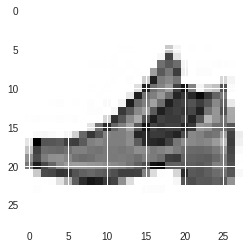

In [17]:
image = X_train[1][:,:,0]

%matplotlib inline
import matplotlib.pyplot as plt

imgplot = plt.imshow(image)

Normalize the value

In [0]:
X_train = X_train.astype('float32') # convert to float32 values 
X_test = X_test.astype('float32') 
X_train /= 255 # Normalize. Divide by the max of the value (255) as the values range from 0 to 255
X_test /= 255

In [19]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

**Let's build the model from scratch**
I used the same model as the one on keras code example and modify it a little. 
The standart way to build a CNN is repeatedly stacking Convolution layer -> Max Pooling layer -> Convolution layer -> Max Pooling layer -> ... and flatten it as an input into fully-connected networks.
Dropout layers are used to prevent overfitting

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


input_shape = (img_rows, img_cols, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_fashion_cnn.hdf5", verbose=0, save_best_only=True) # save best model


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

Let's Train the model!

In [22]:
model.fit(X_train,y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_test,y_test),
          callbacks=[monitor,checkpointer]
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.5836 - acc: 0.7841 - val_loss: 0.3736 - val_acc: 0.8671
Epoch 2/10
53900/60000 [=========================>....] - ETA: 1s - loss: 0.3958 - acc: 0.8577

60000/60000 [==============================] - 15s 250us/step - loss: 0.3937 - acc: 0.8583 - val_loss: 0.2997 - val_acc: 0.8919
Epoch 3/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.3443 - acc: 0.8754 - val_loss: 0.2746 - val_acc: 0.8996
Epoch 4/10
28200/60000 [=============>................] - ETA: 7s - loss: 0.3114 - acc: 0.8849

60000/60000 [==============================] - 15s 249us/step - loss: 0.3166 - acc: 0.8840 - val_loss: 0.2519 - val_acc: 0.9066
Epoch 5/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3018 - acc: 0.8878 - val_loss: 0.2414 - val_acc: 0.9098
Epoch 6/10
22450/60000 [==========>...................] - ETA: 8s - loss: 0.2818 - acc: 0.8974

60000/60000 [==============================] - 15s 248us/step - loss: 0.2857 - acc: 0.8950 - val_loss: 0.2378 - val_acc: 0.9125
Epoch 7/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.2746 - acc: 0.8977 - val_loss: 0.2390 - val_acc: 0.9086
Epoch 8/10
20950/60000 [=========>....................] - ETA: 9s - loss: 0.2634 - acc: 0.9032

60000/60000 [==============================] - 15s 249us/step - loss: 0.2656 - acc: 0.9016 - val_loss: 0.2269 - val_acc: 0.9164
Epoch 9/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2554 - acc: 0.9065 - val_loss: 0.2165 - val_acc: 0.9196
Epoch 10/10
20500/60000 [=========>....................] - ETA: 9s - loss: 0.2493 - acc: 0.9033

60000/60000 [==============================] - 15s 248us/step - loss: 0.2510 - acc: 0.9056 - val_loss: 0.2164 - val_acc: 0.9175


In [0]:
model.load_weights('best_weights_fashion_cnn.hdf5') # load weights from best model

In [0]:
pred = model.predict(X_test)
y_pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

In [25]:
pred[0:5]

array([[9.6811712e-01, 1.6701345e-07, 5.2933919e-04, 6.6527682e-05,
        2.8119533e-05, 1.6749141e-08, 3.1256422e-02, 8.2534812e-12,
        2.3295945e-06, 6.0935215e-11],
       [2.4177466e-10, 1.0000000e+00, 4.3861854e-12, 4.9908397e-09,
        1.0158239e-10, 2.8366127e-14, 1.5814862e-10, 1.0677108e-16,
        1.3108325e-11, 2.5583770e-15],
       [6.3068978e-02, 1.0052156e-07, 8.1108332e-01, 2.9386571e-03,
        1.9739260e-04, 6.3798785e-07, 1.2262024e-01, 1.3608648e-09,
        9.0659931e-05, 1.0970060e-08],
       [3.4440295e-03, 7.8235334e-04, 1.3899156e-01, 4.4182925e-03,
        7.2691046e-02, 1.0237942e-04, 7.5461566e-01, 1.7152626e-05,
        2.4881700e-02, 5.5782450e-05],
       [1.2353690e-03, 2.0304875e-05, 1.5211958e-03, 9.9057454e-01,
        3.0787357e-03, 1.0502357e-06, 3.4915754e-03, 1.5562268e-08,
        7.7236851e-05, 2.0424040e-09]], dtype=float32)

In [26]:
y_pred[0:5]

array([0, 1, 2, 6, 3])

In [27]:
y_test[0:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_pred.shape[0]

10000

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [31]:
print('accuracy: ',score[1])
print('loss: ',score[0])

accuracy:  0.9175
loss:  0.21638075131773948


In [32]:
!ls

best_weights_fashion_cnn.hdf5  fashion-mnist_test.csv
datalab			       fashion-mnist_train.csv


In [0]:
!rm best_weights_fashion_cnn.hdf5

In [34]:
!ls

datalab  fashion-mnist_test.csv  fashion-mnist_train.csv
